## Logistic Regression Model

### Extraccion y preparacion

In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Cargar datos
data = pd.read_csv("../datasets_limpios/credit_data_clean.csv")

# Separar variables predictoras y target
X = data.drop(columns=["target"])
y = data["target"]

# Identificar columnas categóricas
cat_cols = X.select_dtypes(include=['object']).columns

# Codificar categóricas con OrdinalEncoder
if len(cat_cols) > 0:
    encoder = OrdinalEncoder()
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

print("✅ Datos preparados para entrenamiento")


✅ Datos preparados para entrenamiento


### Entrenamiento

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar el modelo
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X_train, y_train)

print("✅ Modelo de regresión logística entrenado correctamente")


✅ Modelo de regresión logística entrenado correctamente


### Interpretación: coeficientes y odds ratios

In [4]:
import numpy as np
coef = log_model.coef_[0]
odds_ratios = np.exp(coef)
features = X.columns

coef_df = pd.DataFrame({
    "Feature": features,
    "Coeficiente": coef,
    "Odds Ratio": odds_ratios
}).sort_values(by="Odds Ratio", ascending=False)

print("📊 Coeficientes y Odds Ratios:\n")
display(coef_df)


📊 Coeficientes y Odds Ratios:



,Feature,Coeficiente,Odds Ratio
0,checking_account_status,0.531098,1.700798
14,housing,0.497540,1.644670
2,credit_history,0.404593,1.498692
5,savings_account,0.289492,1.335749
9,other_debtors,0.263887,1.301981
18,telephone,0.245519,1.278285
13,other_installment_plans,0.230875,1.259702
8,personal_status_sex,0.226173,1.253792
6,employment_since,0.116082,1.123088
10,residence_since,0.058218,1.059946


### Extraccion de reglas

In [5]:
print("🧠 Variables más influyentes:")
print(coef_df.head(5))
print("\n🔻 Variables que más reducen la probabilidad:")
print(coef_df.tail(5))


🧠 Variables más influyentes:
                    Feature  Coeficiente  Odds Ratio
0   checking_account_status     0.531098    1.700798
14                  housing     0.497540    1.644670
2            credit_history     0.404593    1.498692
5           savings_account     0.289492    1.335749
9             other_debtors     0.263887    1.301981

🔻 Variables que más reducen la probabilidad:
             Feature  Coeficiente  Odds Ratio
17     people_liable    -0.206324    0.813570
7   installment_rate    -0.247392    0.780834
11          property    -0.252048    0.777208
15  existing_credits    -0.476808    0.620762
19    foreign_worker    -0.968771    0.379549


### Evaluacion completa del modelo

📊 MÉTRICAS DEL MODELO (Regresión Logística)
Accuracy:   0.773
Precision:  0.798
Recall:     0.905
F1-score:   0.848
ROC-AUC:    0.796
PR-AUC:     0.888

🧩 Matriz de confusión:
[[ 42  48]
 [ 20 190]]


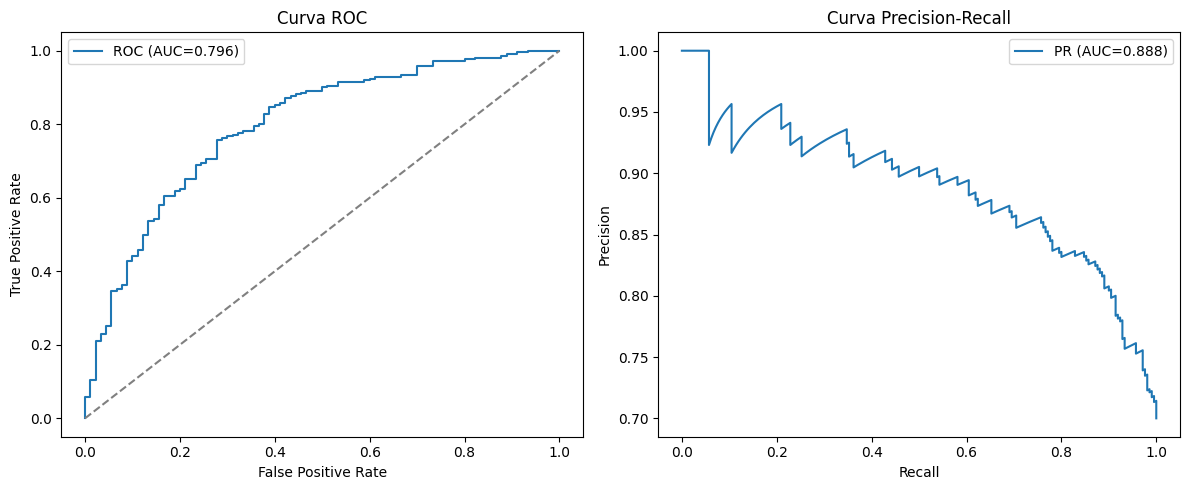

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, precision_recall_curve
)

# Predicciones
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

# Métricas principales
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precisions, recalls, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recalls, precisions)

print("📊 MÉTRICAS DEL MODELO (Regresión Logística)")
print(f"Accuracy:   {acc:.3f}")
print(f"Precision:  {prec:.3f}")
print(f"Recall:     {rec:.3f}")
print(f"F1-score:   {f1:.3f}")
print(f"ROC-AUC:    {roc_auc:.3f}")
print(f"PR-AUC:     {pr_auc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\n🧩 Matriz de confusión:")
print(cm)

# Curvas ROC y PR
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recalls, precisions, label=f"PR (AUC={pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
import joblib
import os

os.makedirs("modelos_guardados", exist_ok=True)

modelo_nombre = "logistic_regression.pkl"  # Cambia por: "arbol_decision.pkl", "log_reg.pkl", "red_neuronal.pkl", etc.

joblib.dump(log_model, f"modelos_guardados/{modelo_nombre}")

print(f"✅ Modelo guardado correctamente en: modelos_guardados/{modelo_nombre}")


✅ Modelo guardado correctamente en: modelos_guardados/logistic_regression.pkl
